# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

In this project we are trying to scrap data **15 pages** from the Kalibrr job portal website. Kalibrr is a company that provides a platform for worker recruitment

There are 4 data that we collect, namely:

1. job title
2. work location
3. date of work posted and dealine submit application
4. companies

from this data we will make visualization data related to the **distribution of the number of jobs in a location**



## Prepare The Environtment

In [269]:
# Mempersiapkan environtment
import requests
import datetime as dt
import pandas as pd
import numpy as np
import warnings
import re
warnings.filterwarnings("ignore")

from pandas.tseries.offsets import Day
from bs4 import BeautifulSoup
import requests




## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [ ]:
url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/'+str(page))

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [63]:
url_get.content[1:500]

b'!DOCTYPE html><html lang="id-ID"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="o'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [71]:
soup = BeautifulSoup(url_get.content,"html.parser")




## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [72]:
 table = soup.find('div', attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})


In [51]:
## job title
table.find_all('div', attrs={'class':'k-col-start-3 k-row-start-1'})[:5]
table.find_all('h2', attrs={'k-text-xl k-font-medium'})[:5]
table.find_all('a', attrs={'class':'k-text-primary-color'})[0].text


'.Net Developer'

In [38]:
##location

table.find_all('a', attrs={'class':'k-text-subdued k-block'})[0].text 

'Tangerang Selatan, Indonesia'

In [41]:
##perusahaan
table.find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})[1].text 


'PT Adicipta Inovasi Teknologi'

In [42]:
#tanggal post

table.find_all('span', attrs={'class':'k-block k-mb-1'})[0].text 

'Posted 3 days ago • Apply before 19 May'

Finding row length.

In [66]:
row = table.find_all('a', attrs={'class':'k-text-primary-color'})
row_length = len(row)
row_length

15

Do the scrapping process here (please change this markdown with your explanation)

In [270]:
temp = [] #initiating a tuple

## using for statement for looping to get data from 1 to 15 pages in kalibrr
for page in range(1, 15):
    i=0
    # requesting data from kalibrr
    url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/'+str(page))
    soup = BeautifulSoup(url_get.content,"html.parser")
    table = soup.find('div', attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
    
    # find length total data
    row = table.find_all('a', attrs={'class':'k-text-primary-color'})
    row_length = len(row)
    
    for i in range(0, row_length):
    
        #Get Job_title
        job_title=table.find_all('a', attrs={'class':'k-text-primary-color'})[i].text
        job_title = job_title.strip() #remove blank space
        
        #get Location
        location= table.find_all('a', attrs={'class':'k-text-subdued k-block'})[i].text
        location = location.strip() #remove blank space
        
        #get Company
        Company = table.find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})[i].text 
        Company = Company.strip() #remove blank space      
        
        #Period
        Period =table.find_all('span', attrs={'class':'k-block k-mb-1'})[i].text 
        Period = Period.strip() #remove blank space
    
        temp.append((Company,job_title,location,Period)) 

## Creating data frame & Data wrangling

Put the array into dataframe

In [272]:
#Create dataframe df 

df = pd.DataFrame(temp,columns=('Company','Job Title','location','period'))

#save RAW data to CSV
df.to_csv('capstone_raw_data.csv',index=False)



### Process WRANGLING DATA

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [273]:


# seperate string ",indonesia"
df['location'] = df['location'].str.split(',').str[0]

# City standardization
df['location General'] = df['location']

df['location General'] = df['location General'].str.replace('Kota Jakarta Barat','Jakarta')
df['location General'] = df['location General'].str.replace('Jakarta Selatan','Jakarta')
df['location General'] = df['location General'].str.replace('Tangerang Selatan','Tangerang')
df['location General'] = df['location General'].str.replace('Jakarta Pusat','Jakarta')
df['location General'] = df['location General'].str.replace('Central Jakarta City','Jakarta')
df['location General'] = df['location General'].str.replace('Jakarta Utara','Jakarta')
df['location General'] = df['location General'].str.replace('Jakarta Barat','Jakarta')
df['location General'] = df['location General'].str.replace('Kota Jakarta Pusat','Jakarta')
df['location General'] = df['location General'].str.replace('Bandung Kota','Bandung')
df['location General'] = df['location General'].str.replace('Bandung Kabupaten','Bandung')
df['location General'] = df['location General'].str.replace('Jakarta Timur','Jakarta')
df['location General'] = df['location General'].str.replace('Kota Jakarta Selatan','Jakarta')
df['location General'] = df['location General'].str.replace('Tangerang Selatan','Tangerang')
df['location General'] = df['location General'].str.replace('Tangerang Kota','Tangerang')
df['location General'] = df['location General'].str.replace('Kota Central Jakarta','Jakarta')
df['location General'] = df['location General'].str.replace('Kota South Jakarta','Jakarta')
df['location General'] = df['location General'].str.replace('South Tangerang','Tangerang')
df['location General'] = df['location General'].str.replace('West Jakarta','Jakarta')
df['location General'] = df['location General'].str.replace('Central Jakarta','Jakarta')
df['location General'] = df['location General'].str.replace('North Jakarta','Jakarta')
df['location General'] = df['location General'].str.replace('South Jakarta','Jakarta')
df['location General'] = df['location General'].str.replace('East Jakarta','Jakarta')
df['location General'] = df['location General'].str.replace('Kota Jakarta','Jakarta')

# Jakarta City standardization
df['location'] = df['location'].str.replace('Kota Jakarta Barat','Jakarta Barat')
df['location'] = df['location'].str.replace('Jakarta Selatan','Jakarta Selatan')
df['location'] = df['location'].str.replace('Tangerang Selatan','Tangerang Selatan')
df['location'] = df['location'].str.replace('Jakarta Pusat','Jakarta Pusat')
df['location'] = df['location'].str.replace('Central Jakarta City','Jakarta Pusat')
df['location'] = df['location'].str.replace('Jakarta Utara','Jakarta Utara')
df['location'] = df['location'].str.replace('Jakarta Barat','Jakarta Barat')
df['location'] = df['location'].str.replace('Kota Jakarta Pusat','Jakarta Pusat')
df['location'] = df['location'].str.replace('Bandung Kota','Bandung')
df['location'] = df['location'].str.replace('Bandung Kabupaten','Bandung')
df['location'] = df['location'].str.replace('Jakarta Timur','Jakarta Timur')
df['location'] = df['location'].str.replace('Kota Jakarta Selatan','Jakarta Selatan')
df['location'] = df['location'].str.replace('Tangerang Selatan','Tangerang')
df['location'] = df['location'].str.replace('Tangerang Kota','Tangerang')
df['location'] = df['location'].str.replace('Kota Central Jakarta','Jakarta Pusat')
df['location'] = df['location'].str.replace('Kota South Jakarta','Jakarta Selatan')
df['location'] = df['location'].str.replace('South Tangerang','Tangerang')
df['location'] = df['location'].str.replace('West Jakarta','Jakarta Barat')
df['location'] = df['location'].str.replace('Central Jakarta','Jakarta Pusat')
df['location'] = df['location'].str.replace('North Jakarta','Jakarta Utara')
df['location'] = df['location'].str.replace('South Jakarta','Jakarta Selatan')
df['location'] = df['location'].str.replace('East Jakarta','Jakarta Timur')
df['location'] = df['location'].str.replace('Kota Jakarta','Jakarta Pusat')

#Replace word Jakarta to Jakarta Pusat in columns Location
df.loc[df['location']=='Jakarta','location']='Jakarta Pusat'

# Separate data between Date Post job and date deadline Apply Job
df['period_posted'] = df['period'].str.split('•').str[0]
df['period'] = df['period'].str.split('•').str[1]

# Take only number from columns PostedDay
df['PostedDay']=df['period_posted'].str.extract('(\d+)')

#Create new columns value_is_NaN to see data NAN base on PostDay Columns
df.loc[df['PostedDay'].isnull(),'value_is_NaN'] = 'Yes'

#Create new 2 datafame to separate value_is_NaN

df1 = df[df['value_is_NaN']!='Yes']
df2 = df[df['value_is_NaN']=='Yes']

#change type of PostedDay to INT in df1
df1['PostedDay'] = df1['PostedDay'].astype('int')

#convert month to days in df1
df1.loc[df['period_posted'].str.contains("months"),'PostedDay']=df1['PostedDay']*30

#converts days to date in df1
df1['PostedDate']=pd.to_datetime(dt.datetime.today().strftime('%Y-%m-%d'))
df1['PostedDate'] = df1['PostedDate'] - pd.to_timedelta(df1['PostedDay'], unit='D')


#convert PostedDate to datetime in df2
df2['PostedDate']=pd.to_datetime(dt.datetime.today().strftime('%Y-%m-%d'))

#fill na with 30 days (NA data is a month data) in df2
df2['PostedDay'].fillna(value=30, inplace=True)
df2['PostedDate'] = df2['PostedDate'] - pd.to_timedelta(df2['PostedDay'], unit='D')

#merge dataframe from df1 and df2
df_merged = pd.concat([df1, df2], ignore_index=True, sort=False)

#Create New DataFrame Test for Period (deadline submit application) and do the replace string to get date data
test = pd.DataFrame(df['period'].str.replace('Apply before','')+' 2023')

#remove blank space in columns Test.Period
test = test['period'].str.strip()

#create new columns in dataframe df_merge after format to datetime in columns Test.Period
df_merged['period apply before']=pd.to_datetime(test,dayfirst=True,format='mixed')

#change type dataframe
df_merged['location'] = df_merged['location'].astype('category')
df_merged['location General'] = df_merged['location General'].astype('category')

#save data to csv
df_merged.to_csv('capstone_olah_data.csv',index=False)


In [281]:
#cek periode pengambilan data awal
df_merged['PostedDate'].min()

Timestamp('2022-11-16 00:00:00')

In [282]:
#cek periode pengambilan data Akhir
df_merged['PostedDate'].max()

Timestamp('2023-05-13 00:00:00')

In [275]:
#filter data for Jakarta detail location
df_merged_jakarta = df_merged[df_merged['location General']=='Jakarta']

Job_pivot_table_jakarta = df_merged_jakarta.pivot_table(
    index = 'location',
    values='Job Title',
    aggfunc='count'
).sort_values(by='Job Title',ascending=True)
Job_pivot_table_jakarta

,Job Title
location,
Bandung,0
Bekasi,0
Denpasar,0
Mojokerto,0
Surabaya,0
Tangerang,0
Yogyakarta,0
Jakarta Timur,7
Jakarta Barat,12


In [280]:
#data from General location

Job_pivot_table=df_merged.pivot_table(
    index = 'location General',
    values='Job Title',
    aggfunc='count'
).sort_values(by='Job Title',ascending=True).reset_index()
Job_pivot_table

,location General,Job Title
0,Denpasar,1
1,Mojokerto,1
2,Bekasi,2
3,Yogyakarta,2
4,Surabaya,3
5,Bandung,4
6,Tangerang,27
7,Jakarta,170


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '27'),
 Text(0, 0, '170')]

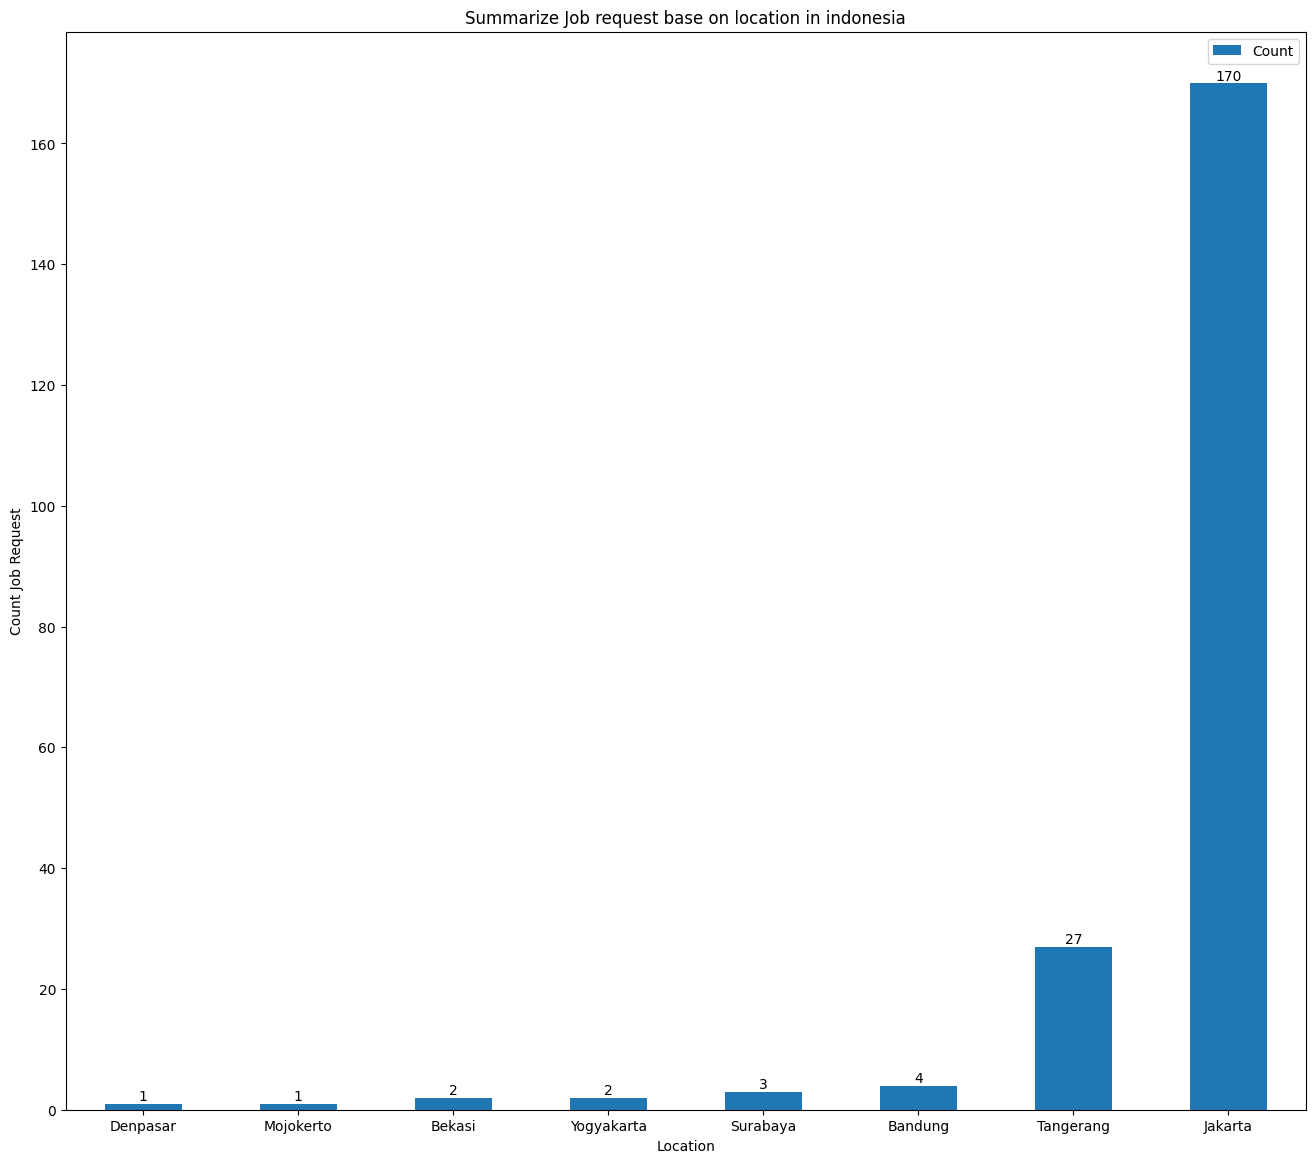

In [278]:
#data visualisation for general location

ax = Job_pivot_table.plot(kind='bar',
                    rot=0,
                                 title= 'Summarize Job request base on location in indonesia',
                                 figsize=(16, 14),
                                 ylabel='Count Job Request',
                                 xlabel='Location');

ax.legend(["Count"])
ax.bar_label(ax.containers[0])


[Text(0, 0, '6'),
 Text(0, 0, '14'),
 Text(0, 0, '17'),
 Text(0, 0, '66'),
 Text(0, 0, '71')]

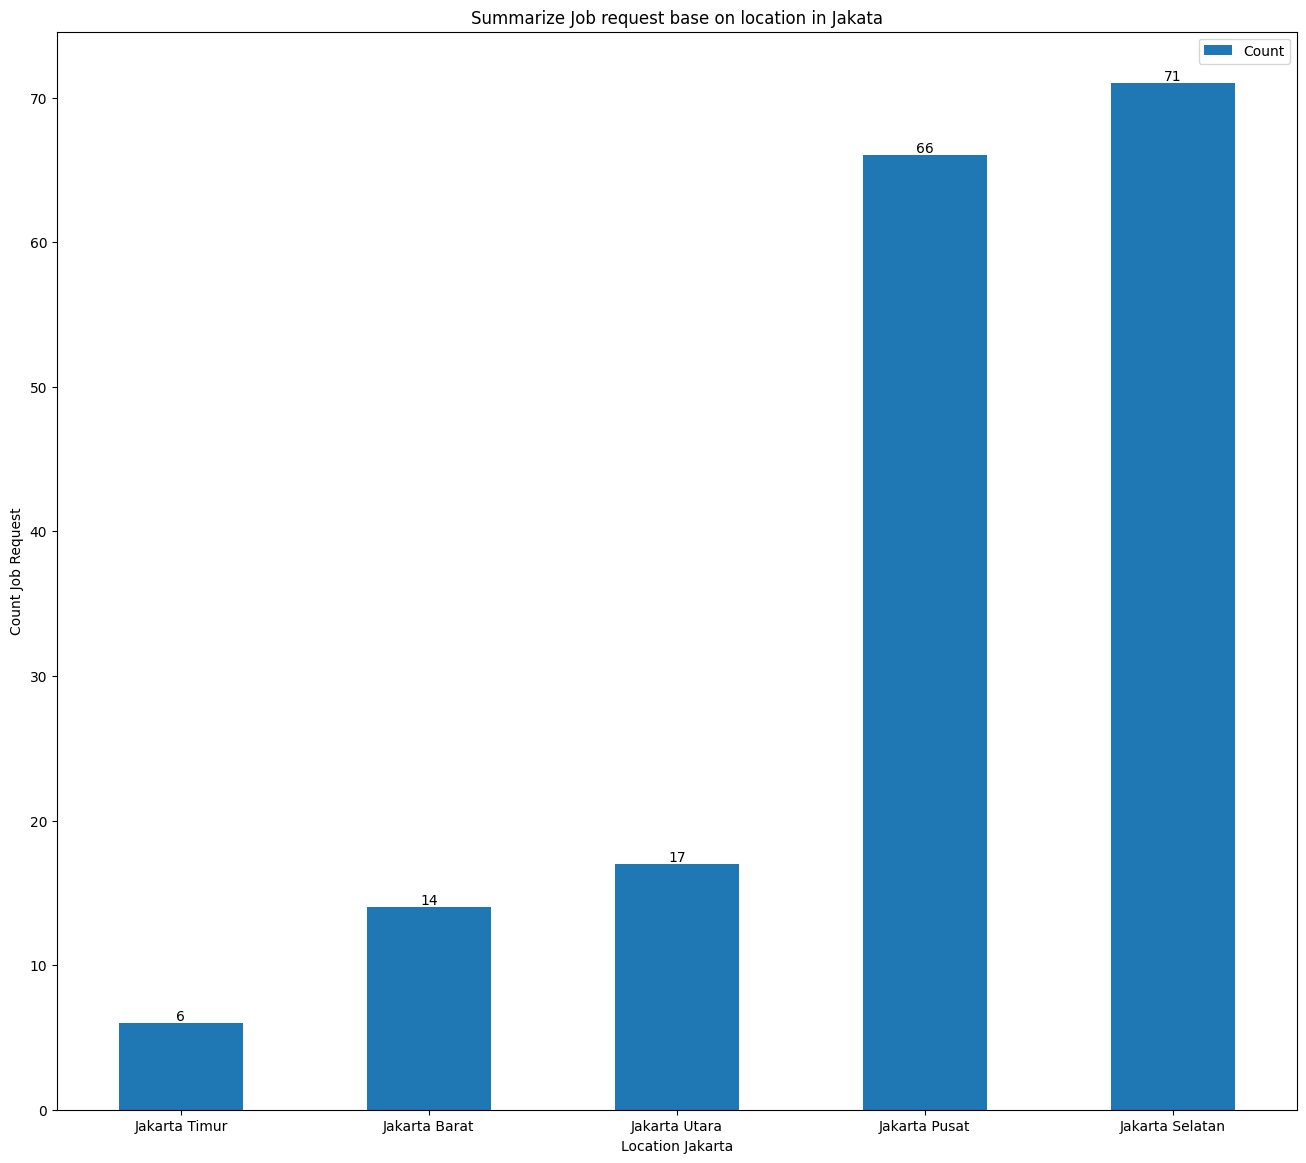

In [253]:
#data visualisation for Jakarta

ax = Job_pivot_table_jakarta.plot(kind='bar',
                    rot=0,
                                 title= 'Summarize Job request base on location in Jakata',
                                 figsize=(16, 14),
                                 ylabel='Count Job Request',
                                 xlabel='Location Jakarta');

ax.legend(["Count"])
ax.bar_label(ax.containers[0])



from the conclusion above that there were **174** job offers in Jakarta and from these 174 data 2 of them were dominant from **South Jakarta with 71 jobs** and **Central Jakarta with 66 jobs**

### conclusion
Jakarta still become the **most business central disctrict in indonesia**

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.